### Importing packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize': (15,9)})

In [3]:
employees = pd.read_excel("/Users/AnhHuynh/Documents/SUMMER 2023/MIS 431/Mid-term project/Employee Data Formatted - MIS 431 Summer 2023 (1100 Records) f.xlsx")

### Explore data

In [4]:
employees.head()
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   left_company         1100 non-null   object 
 1   department           1100 non-null   object 
 2   job_level            1100 non-null   object 
 3   salary               1100 non-null   float64
 4   weekly_hours         1100 non-null   int64  
 5   business_travel      1100 non-null   object 
 6   yrs_at_company       1100 non-null   int64  
 7   yrs_since_promotion  1100 non-null   int64  
 8   previous_companies   1100 non-null   int64  
 9   job_satisfaction     1100 non-null   object 
 10  performance_rating   1100 non-null   object 
 11  marital_status       1100 non-null   object 
 12  miles_from_home      1100 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 111.8+ KB


### Is there a correlation between leaving and salary?

In [5]:
factor1 = employees.groupby(by='left_company')

for x in factor1:
    n_employees=factor1.size()
    max_salary=factor1['salary'].max()
    median_salary=factor1['salary'].median()
    min_salary=factor1['salary'].min()

print('Employees count', n_employees, 
    '\nMinimum salary',min_salary,
    '\nMedian salary',median_salary,
    '\nMaximum salary',max_salary)

Employees count left_company
No     915
Yes    185
dtype: int64 
Minimum salary left_company
No     30559.081175
Yes    30488.149701
Name: salary, dtype: float64 
Median salary left_company
No     90648.947912
Yes    69436.932900
Name: salary, dtype: float64 
Maximum salary left_company
No     212134.700550
Yes    205266.898625
Name: salary, dtype: float64


Text(0.5, 1.0, 'Salary vs Leaving Status')

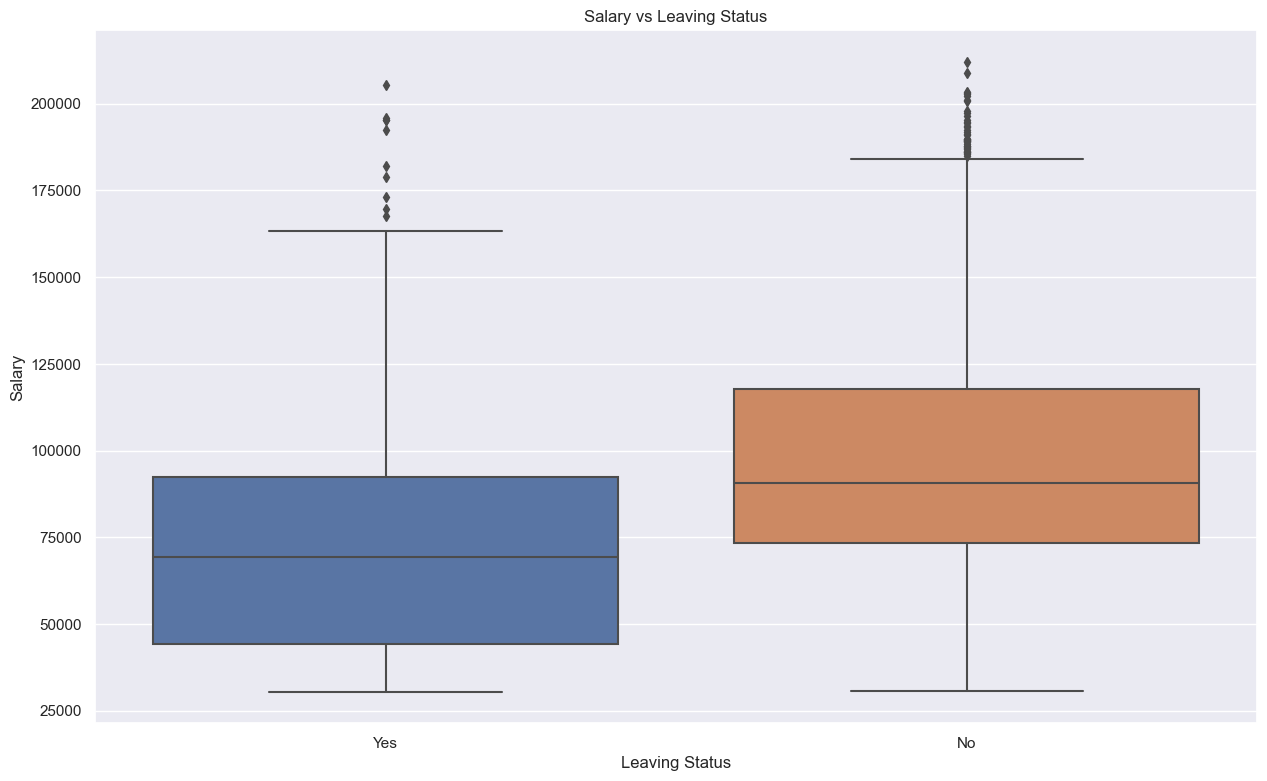

In [6]:
sns.boxplot(employees,x='left_company', y='salary')
plt.xlabel("Leaving Status")
plt.ylabel("Salary")
plt.title("Salary vs Leaving Status")

### Does commuting distance contribute to reasons for leaving?

In [7]:
for x in employees.groupby('left_company'):
    min_distance = employees['miles_from_home'].min()
    max_distance = employees['miles_from_home'].max()
    avg_distance = employees['miles_from_home'].mean()

print('Minimum dist', min_distance,
    '\nMaximum dist', max_distance,
    '\nAverage dist', avg_distance)


 

Minimum dist 1 
Maximum dist 29 
Average dist 9.032727272727273


Text(0.5, 1.0, 'Distance vs. Leaving status')

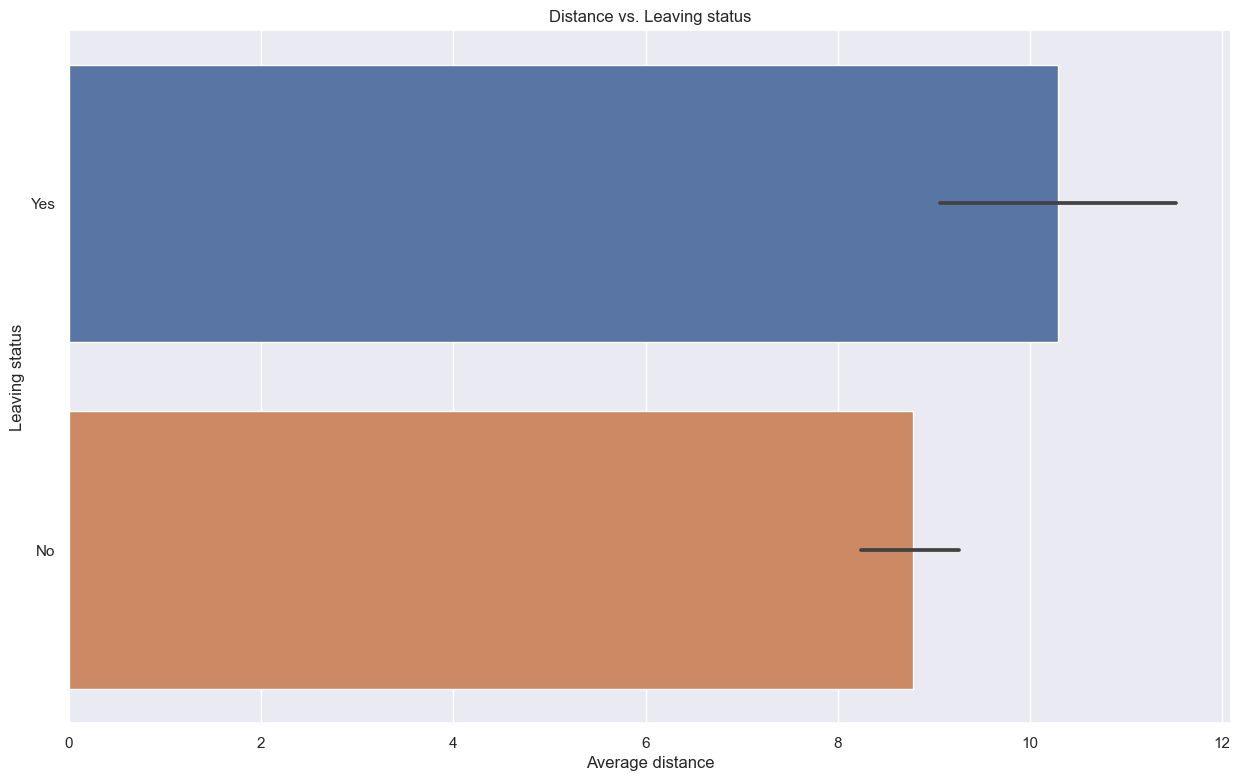

In [8]:
sns.barplot(employees,
            x='miles_from_home',
            y= 'left_company',
            estimator=np.mean,
            orient="h")
plt.xlabel("Average distance")
plt.ylabel("Leaving status")
plt.title("Distance vs. Leaving status")

### Do people leave because of low job satistfaction?

In [9]:
factor3 = employees.groupby(['left_company','job_satisfaction']).count()
factor3

department  job_level  salary  weekly_hours  \
left_company job_satisfaction                                                
No           High                     268        268     268           268   
             Low                      165        165     165           165   
             Medium                   173        173     173           173   
             Very High                309        309     309           309   
Yes          High                      63         63      63            63   
             Low                       50         50      50            50   
             Medium                    33         33      33            33   
             Very High                 39         39      39            39   

                               business_travel  yrs_at_company  \
left_company job_satisfaction                                    
No           High                          268             268   
             Low                           165             165   
             Medium                        173             173   
             Very High                     309             309   
Yes          High                           63              63   
             Low                            50              50   
             Medium                         33              33   
             Very High                      39              39   

                               yrs_since_promotion  previous_companies  \
left_company job_satisfaction                                            
No           High                              268                 268   
             Low                               165                 165   
             Medium                            173                 173   
             Very High                         309                 309   
Yes          High                               63                  63   
             Low                                50                  50   
             Medium                             33                  33   
             Very High                          39                  39   

                               performance_rating  marital_status  \
left_company job_satisfaction                                       
No           High                             268             268   
             Low                              165             165   
             Medium                           173             173   
             Very High                        309             309   
Yes          High                              63              63   
             Low                               50              50   
             Medium                            33              33   
             Very High                         39              39   

                               miles_from_home  
left_company job_satisfaction                   
No           High                          268  
             Low                           165  
             Medium                        173  
             Very High                     309  
Yes          High                           63  
             Low                            50  
             Medium                         33  
             Very High                      39

Text(0.5, 1.0, 'Job satisfaction vs. Leaving status')

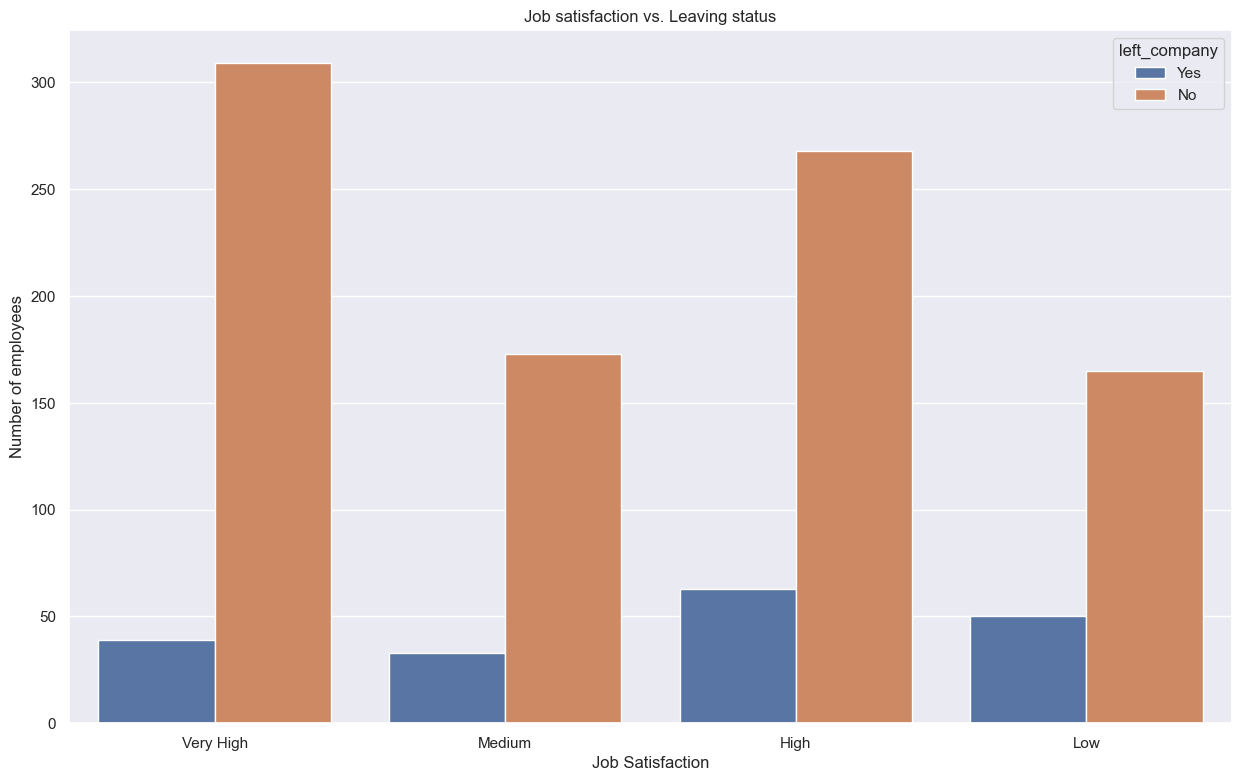

In [10]:
sns.countplot(data=employees,
            x='job_satisfaction',
            hue="left_company")
plt.xlabel("Job Satisfaction")
plt.ylabel("Number of employees")
plt.title("Job satisfaction vs. Leaving status")

### Which department has the highest rate of employee attrition?

In [11]:
data = employees.groupby(['left_company','department']).size()
data.sort_values(ascending=False)

data


left_company  department            
No            Finance and Operations     66
              IT and Analytics          269
              Marketing                 134
              Product Development        98
              Research                  214
              Sales                     134
Yes           Finance and Operations     24
              IT and Analytics           23
              Marketing                  35
              Product Development        41
              Research                    8
              Sales                      54
dtype: int64

In [12]:
dept_count=employees.groupby('department').size()
dept_count

department
Finance and Operations     90
IT and Analytics          292
Marketing                 169
Product Development       139
Research                  222
Sales                     188
dtype: int64

In [13]:
pct = 100*data/dept_count
pct.sort_values(ascending=False)

left_company  department            
No            Research                  96.396396
              IT and Analytics          92.123288
              Marketing                 79.289941
              Finance and Operations    73.333333
              Sales                     71.276596
              Product Development       70.503597
Yes           Product Development       29.496403
              Sales                     28.723404
              Finance and Operations    26.666667
              Marketing                 20.710059
              IT and Analytics           7.876712
              Research                   3.603604
dtype: float64

### What is the relationship between performance and leaving status?

In [14]:
factor5_1 = employees[employees['left_company']=='Yes'].groupby('performance_rating').size()

factor5_1
    

performance_rating
Exceeds Expectations    29
Exceptional              2
Meets Expectations      79
Minimally Effective     62
Not Effective           13
dtype: int64

In [15]:
factor5_2 = employees[employees['left_company'] == 'No'].groupby('performance_rating').size()
 
factor5_2

performance_rating
Exceeds Expectations    337
Exceptional             202
Meets Expectations      317
Minimally Effective      48
Not Effective            11
dtype: int64

### Is hours of working reason for leaving?

In [16]:
factor6 = employees.groupby(by='left_company')

for x in factor6:
    n_employees = factor6.size()
    min_hours = factor6['weekly_hours'].min()
    avg_hours = factor6['weekly_hours'].mean()
    max_hours = factor6['weekly_hours'].max()

print('Number of employees', n_employees,
    '\nMinimum hours', min_hours,
      '\nAverage hours', avg_hours,
      '\nMaximum hours', max_hours)

Number of employees left_company
No     915
Yes    185
dtype: int64 
Minimum hours left_company
No     40
Yes    51
Name: weekly_hours, dtype: int64 
Average hours left_company
No     48.351913
Yes    58.659459
Name: weekly_hours, dtype: float64 
Maximum hours left_company
No     58
Yes    66
Name: weekly_hours, dtype: int64


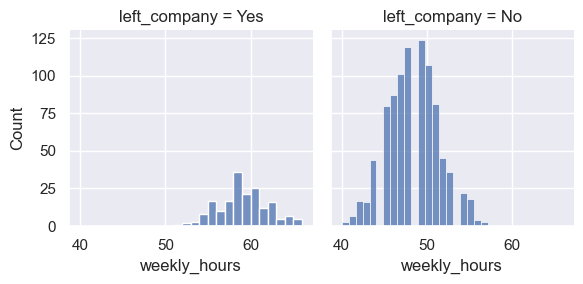

In [17]:

g = sns.FacetGrid(employees, col='left_company')
g.map(sns.histplot,'weekly_hours')
